# PTML Project Analysis Part 1: Supervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv("data.csv")
df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


## Cleaning Data

In [3]:
droped = ['mfcc']*19
for i in range(19):
    droped[i] += str(i+2)

df = df.drop(columns=droped)
df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,blues
...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,rock


In [4]:
df.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
label                 0
dtype: int64

## Analysis
### Statistics
In a first time, we are interested in some statistics values such as mean, standard deviation, median, minimum value and maximum value. We will take our quantitative columns and display on each an histogram followed by its statistics values.

In [22]:
df_quant = df.iloc[:,1:10]
df_quant

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568
...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322


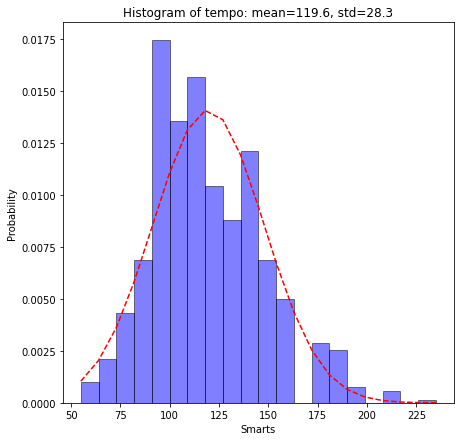

Statistcis:
Mean = 119.60170189683186
Standard Deviation = 28.297367385710128
Median = 117.45383522727272
Min value = 54.978390957446805
Max value = 234.90767045454547


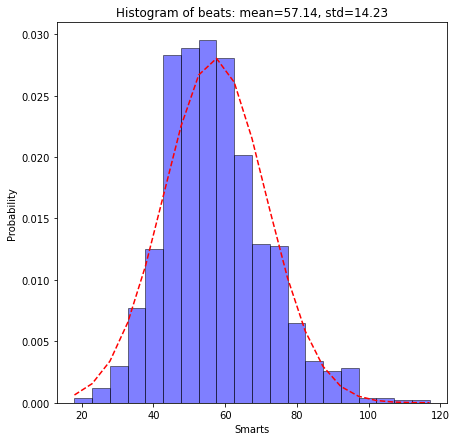

Statistcis:
Mean = 57.138
Standard Deviation = 14.225727655460275
Median = 56.0
Min value = 18
Max value = 117


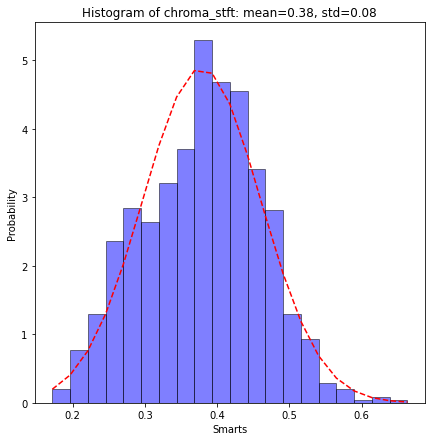

Statistcis:
Mean = 0.37865564817599057
Standard Deviation = 0.08168938087777838
Median = 0.38307461179866453
Min value = 0.171782316163244
Max value = 0.6635726746877475


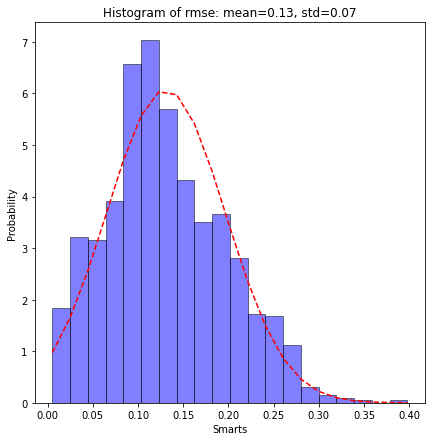

Statistcis:
Mean = 0.1309286197312176
Standard Deviation = 0.06568523716988389
Median = 0.12244774401187894
Min value = 0.0052756136283278
Max value = 0.3980118632316589


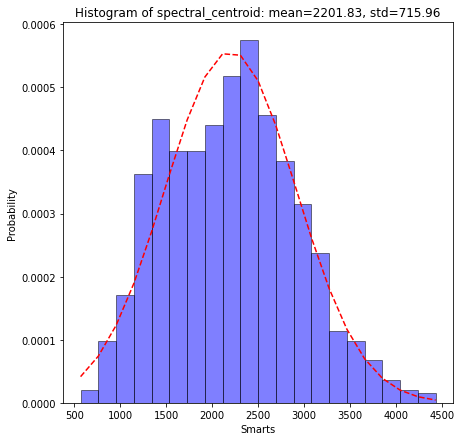

Statistcis:
Mean = 2201.834225749088
Standard Deviation = 715.9613467789105
Median = 2209.4687802657836
Min value = 569.9307210492651
Max value = 4434.439444257259


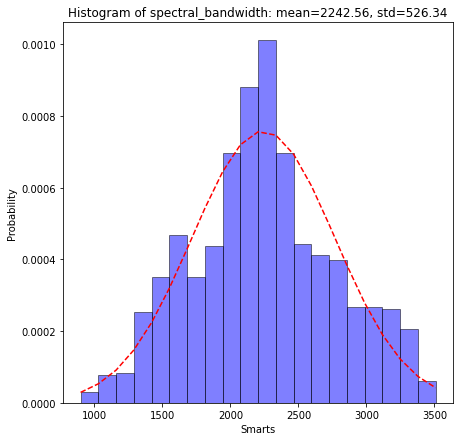

Statistcis:
Mean = 2242.5596132904925
Standard Deviation = 526.3376628321574
Median = 2221.4089826260342
Min value = 897.9943189328015
Max value = 3509.578677055124


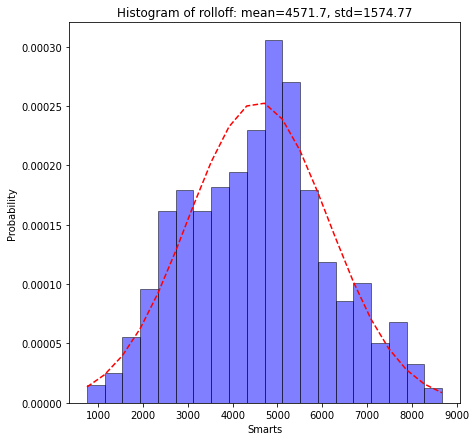

Statistcis:
Mean = 4571.702159056712
Standard Deviation = 1574.770035443866
Median = 4658.6718296488
Min value = 749.0621371904025
Max value = 8676.405868294069


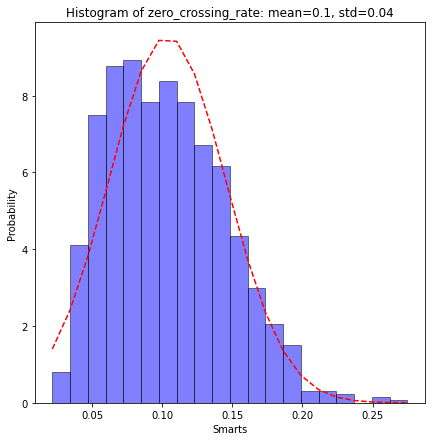

Statistcis:
Mean = 0.10363725784158566
Standard Deviation = 0.0418344692769416
Median = 0.09953870271381575
Min value = 0.0217005490518575
Max value = 0.2748294039038312


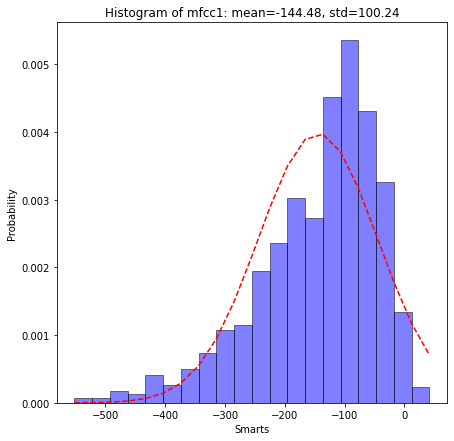

Statistcis:
Mean = -144.47917284908613
Standard Deviation = 100.23566052292095
Median = -120.20607186731016
Min value = -552.0640633094026
Max value = 42.03458706710257


In [56]:
num_bins = 20

#Global mini and maxi values for each column
#[[("name",name), ("min",min), ""max",max)],...]
mini_maxi = []

for col in df_quant:
    #Get statistics values
    mean = df_quant[col].mean()
    std = df_quant[col].std()
    median = df_quant[col].median()
    mini = df_quant[col].min()
    maxi = df_quant[col].max()

    #Append to global statistics list
    mini_maxi.append([(str(col),col), ("Mini",mini), ("Maxi",maxi)])

    #Create histogram
    plt.figure(figsize=(7,7))
    x = df_quant[col].values
    n, bins, patches = plt.hist(x, num_bins, density=True, stacked=True, facecolor='blue', edgecolor="black" ,alpha=0.5)

    #Add a 'best fit' line
    y = norm.pdf(bins, mean, std)
    plt.plot(bins, y, 'r--')

    #Legend
    plt.xlabel('Smarts')
    plt.ylabel('Probability')
    title = "Histogram of " + col + ": mean=" + str(round(mean,2)) + ", std=" + str(round(std,2))
    plt.title(title)
    plt.show()
    print("Statistcis:")
    print("Mean =", mean)
    print("Standard Deviation =", std)
    print("Median =", median)
    print("Min value =", mini)
    print("Max value =", maxi)
    

### Link with music
For each colunms, we have now its minimum value and maximum value. It is interesting to know with which type of music these values correspond.

In [57]:
for col in mini_maxi:
    print(col[0][0].capitalize())
    for i in range(1,len(col)):
        s = str(df['label'].loc[df[col[0][1]] == col[i][1]])
        printed = col[i][0] + " value correspond to"
        print(printed, s.split()[1].capitalize())
    print("---------------------")
        

Tempo
Mini value correspond to Jazz
Maxi value correspond to Classical
---------------------
Beats
Mini value correspond to Classical
Maxi value correspond to Classical
---------------------
Chroma_stft
Mini value correspond to Jazz
Maxi value correspond to Reggae
---------------------
Rmse
Mini value correspond to Classical
Maxi value correspond to Pop
---------------------
Spectral_centroid
Mini value correspond to Blues
Maxi value correspond to Reggae
---------------------
Spectral_bandwidth
Mini value correspond to Classical
Maxi value correspond to Pop
---------------------
Rolloff
Mini value correspond to Classical
Maxi value correspond to Pop
---------------------
Zero_crossing_rate
Mini value correspond to Blues
Maxi value correspond to Reggae
---------------------
Mfcc1
Mini value correspond to Classical
Maxi value correspond to Reggae
---------------------


### Correlation
It is also interesting to see the correlation betweenn our variables.

In [24]:
matrix = df.corr()
matrix

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1
tempo,1.000000,0.966179,0.030640,-0.043503,-0.014415,-0.039283,-0.020564,0.019935,0.011271
beats,0.966179,1.000000,0.080684,0.004607,0.035843,0.011287,0.033489,0.056517,0.082156
chroma_stft,0.030640,0.080684,1.000000,0.499577,0.615524,0.517482,0.597910,0.554735,0.659294
rmse,-0.043503,0.004607,0.499577,1.000000,0.509984,0.529768,0.537718,0.332119,0.807260
spectral_centroid,-0.014415,0.035843,0.615524,0.509984,1.000000,0.904438,0.979633,0.874755,0.720831
spectral_bandwidth,-0.039283,0.011287,0.517482,0.529768,0.904438,1.000000,0.956194,0.612325,0.648373
rolloff,-0.020564,0.033489,0.597910,0.537718,0.979633,0.956194,1.000000,0.779809,0.721746
zero_crossing_rate,0.019935,0.056517,0.554735,0.332119,0.874755,0.612325,0.779809,1.000000,0.634139
mfcc1,0.011271,0.082156,0.659294,0.807260,0.720831,0.648373,0.721746,0.634139,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

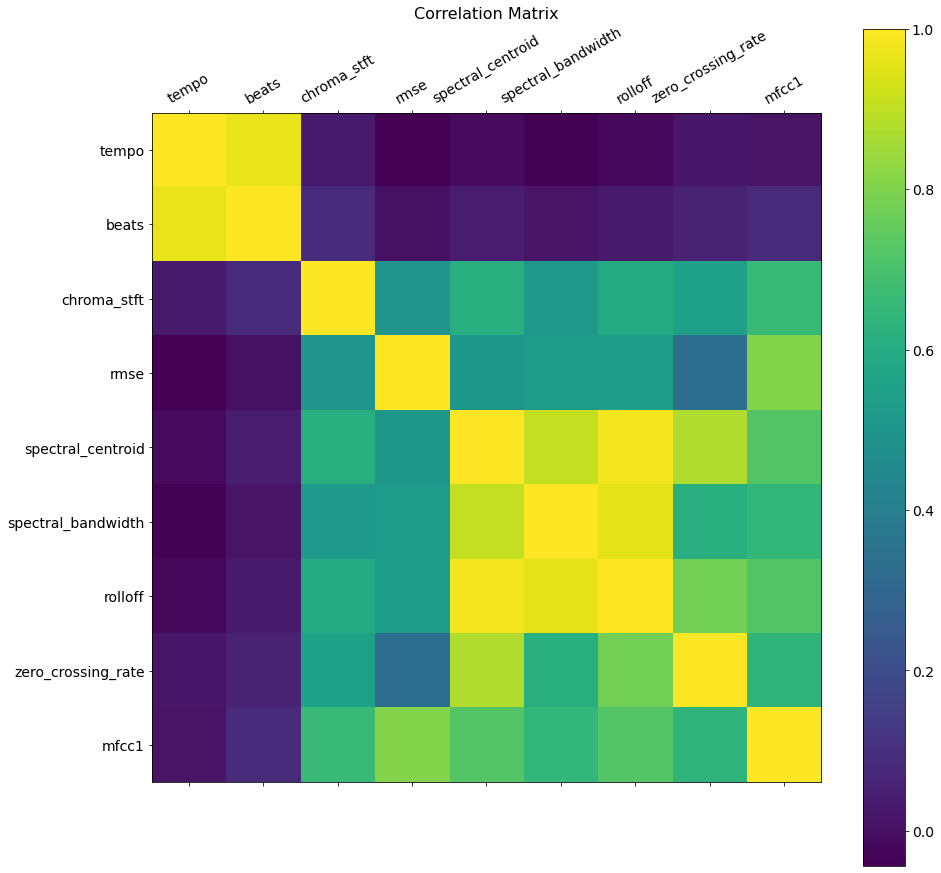

In [25]:
fig = plt.figure(figsize=(15, 15))
plt.matshow(matrix, fignum=fig.number)
plt.xticks(range(df_quant.shape[1]), df_quant.columns, fontsize=14, rotation=30)
plt.yticks(range(df_quant.shape[1]), df_quant.columns, fontsize=14)
colors = plt.colorbar()
colors.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)